<a href="https://colab.research.google.com/github/git-hys/Python25Study/blob/main/04_01_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 럭키팩 판매(생선)
# 럭키팩에는 생선이 들어있는데 종류가 7가지 랜덤으로 들어있음
# 럭키팩 확률 표기해야함 들어있는 7가지 생선의 확률필요

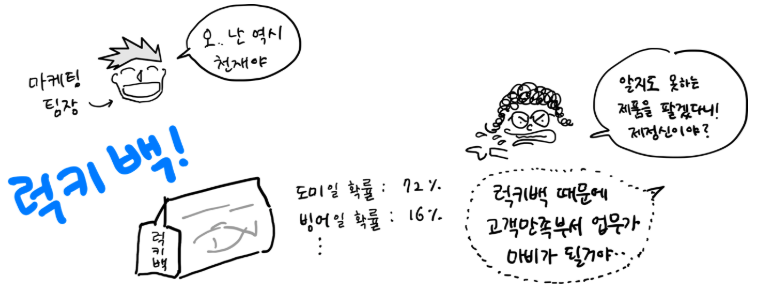

In [2]:
# 럭키팩 확률
# 생선의 크기 무게 (길이 높이 두께 대각선의 길이 무게)

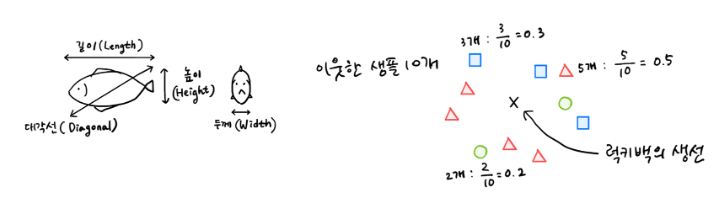

In [4]:
#k - 최 근접 알고리즘을 이용
# 확률을 알려면 회귀를 사용

# 샘플10개중 농어가 3개면 3/10 = 0.3
# 도미가 2개면 2/10 = 0.2

# 사이킷 런의 k- 최근접 이웃 분리기도 이와 동일한 방식으로 확률 계산 가능

# 샘플 데이터 준비
# 로지스틱 회귀 = 확률

import pandas as pd

fish= pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [5]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [18]:
# Bream : 브림(도미)
# Roach : 로치(대구)
# Whitefish : 잉어
# Parkki : 붕어
# Perch : 농어
# Pike : 감물치
# Smelt : 빙어


# 분석용 입력 리스트 값 생성
fish_input = fish[['Weight',	'Length',	'Diagonal',	'Height',	'Width']]
print(fish_input[:4])

   Weight  Length  Diagonal   Height   Width
0   242.0    25.4      30.0  11.5200  4.0200
1   290.0    26.3      31.2  12.4800  4.3056
2   340.0    26.5      31.1  12.3778  4.6961
3   363.0    29.0      33.5  12.7300  4.4555


In [19]:
# 정답 리스트 생성
fish_target = fish['Species'].to_numpy()
print(fish_target[:159])

['Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish'
 'Whitefish' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki'
 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'

In [20]:
# 훈련세트
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

print(train_input.shape, test_input.shape)



(119, 5) (40, 5)


In [24]:
from sklearn.preprocessing import StandardScaler
# 표준점수는 데이터의 범위(스케일조정) = (값 - 평균) / 표준편차
ss = StandardScaler()   # 싸이킷런의 전처리용(스케일조정 : 표준점수)
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
print(train_scaled[:4])

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [ 0.30041219  1.54653445  1.45316551 -0.46981663  0.27291745]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [-0.79734143 -0.60880176 -0.67486907 -0.82480589 -0.27631471]]


In [25]:
from sklearn.neighbors import KNeighborsClassifier # 분류룡
kn = KNeighborsClassifier(n_neighbors=3)  # 이웃 3개 비교
kn.fit(train_scaled, train_target) # 훈련시작

print(kn.score(train_scaled, train_target)) # 89%
print(kn.score(test_scaled, test_target))   # 85

0.8907563025210085
0.85


In [27]:
# 지금 타겟에는 7개의 어종을 넣었다
print(kn.classes_)

# 2개초과 클래스가 포함된 문제를 다중 분류라고 함
# 클래스의 순서가 인덱스로 되어있으며 이것이 오름차순으로 보임

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [29]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [30]:
print(test_scaled[:5])

[[-0.88741352 -0.91804565 -1.03098914 -0.90464451 -0.80762518]
 [-1.06924656 -1.50842035 -1.54345461 -1.58849582 -1.93803151]
 [-0.54401367  0.35641402  0.30663259 -0.8135697  -0.65388895]
 [-0.34698097 -0.23396068 -0.22320459 -0.11905019 -0.12233464]
 [-0.68475132 -0.51509149 -0.58801052 -0.8998784  -0.50124996]]


In [32]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5])
# 사이킷 런이 번거러운 연산을 수행해줌
print(np.round(proba, decimals =4))
# 소수점 5번째에서 반올림하여 4번째 자리까지 표기

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
# ['Perch'  100%
#  'Smelt'  100%
#  'Pike'   100%
#  'Perch'  66.66%
#  'Perch'  66.66% ] 3개의 이웃에 대한 분류 결과를 확인할 수 있다.

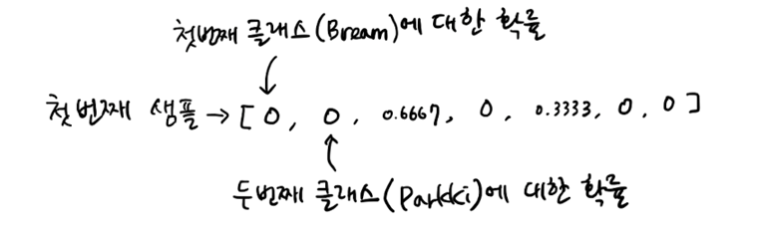

In [33]:
# 이 모델이 계산한 확률이 가장 가까운 이웃의 비율이 맞는 지 확인 필요
distances, indexes = kn.kneighbors(test_scaled[3:4])

print(train_target[indexes])
#                 Perch         Roach
#  [0.     0.     0.6667 0.     0.3333 0.     0.    ]
# Perch 2/3 , Roach 1/3 이기 때문에 7개를 확율로 제공되지 못함
# 이유 : n_neighbors=3으로 했기 때문에

[['Roach' 'Perch' 'Perch']]


In [34]:
# kneighbors는 더미 데이터 보다 더 높은 값이 들어오 ㄹ때 문제가 생김

# 알고리즘 변경 로지스틱 회귀(LogisticRegression)
# 로지스틱 회귀는 사이킷 전에서 제공 from sklearn.linear_model import LogisticRegression
# 로지스틱 회귀는 이름은 회귀지만 분류모델

# 선형 회귀와 동일하게 선형방정식 학습
# z = a * (Weight) + b * (Length) + c * (Diagonal) + d * (Height) + e * (Width) + f
# a, b, c, d, e, f 는 각 항목에 대한 가중치(중요도, 계수)
# z는 어떤 값도 가능함 하지만 확율이 되려면 0~1 (0% ~ 100%) 사이값
# z가 아주 큰 음수일때 0, 아주 큰 양수일때 1이 되도록 바꾸는 방법은 시그모이드 함수나 로지스틱 함수


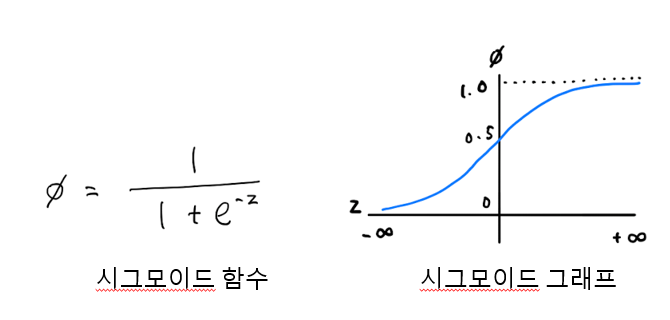

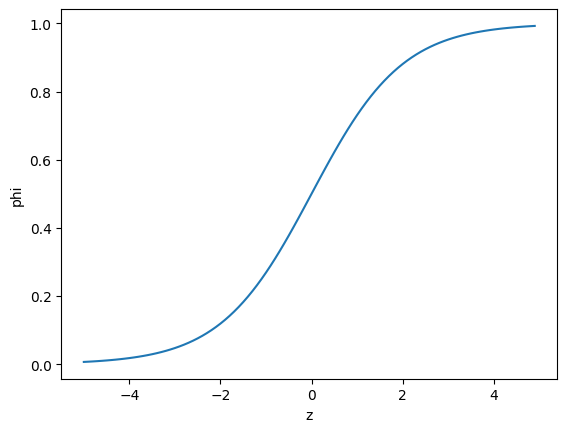

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# 시그모이드 함수용 : z가 무한하게 큰 음수 일 경우 0에 가까워짐
# z가 무한하게 큰 양수 일 경우 1에 가까워짐

z = np.arange(-5, 5, 0.1) # -5~5까지 0.1 간격으로 배열 생성
phi = 1 / (1 + np.exp(-z)) # np.exp() 함수로 시그모이드공식 암기
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [38]:
# 선형 방정식의 출력z의 음수를 사용해 자연 상수 e를 거듭제곱하고 1을 더한 값의 역수를 취함
# 이렇게 하면 0~1 사이 값을 0~100% 확률로 해석 할 수 있다
# 훈련전 2진 분류부터 시작
# 2진 분류인 경우 시그모이드 함수 출력이 0.5 보다 크면 양성 0.5 보다 작으면 음성
# 단 0.5가 나오면 라이브러리마다 좀 다은데 사이킷 런은 음성으로 판단


In [39]:
# 로지스틱 회귀로 이진 분류 수행 테스트

# 넘파이 배열은 True, False 값을 전달하여 행을 선택 할 수 있음
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]]) # 불리언 인덱싱
# 결과 True 값만 나옴

['A' 'C']


In [41]:
# 위와 같은 방식으로 훈련세트에서 도미와 빙어 행만 출력
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')

# bream_smelt_indexes에 도미와 빙어일 경우 True 이고 나머지는 False 가 들어있음
# 이 배열을 활용하여 train_scaled, train_target 배열에 인덱싱 적용
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]
print(train_bream_smelt)

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [ 0.63818253  0.56257661  0.73223951  1.64473401  0.50705737]
 [ 0.30041219  0.23459067  0.42823457  1.36042157  0.22329758]
 [ 0.9027693   0.70314202  0.88858491  1.89027545  0.85537174]
 [-1.0824759  -1.61150165 -1.62162731 -1.7000674  -1.92815631]
 [ 0.10337949  0.04717013  0.23714575  0.88445197  0.41799764]
 [ 1.49668216  1.03112796  1.21864741  2.44274986  1.40289707]
 [ 0.23004337  0.23459067  0.42823457  1.3336029   0.39983213]
 [-0.42579405 -0.29018684 -0.11028847  0.65627104 -0.26107519]
 [ 1.28557569  0.70314202  0.89727076  1.98228866  1.06683526]
 [ 0.93373158  0.60943175  0.83646978  1.85150445  0.97832415]
 [ 0.80706771  0.60943175  0.81041221  1.63137406  1.0255057 ]
 [-1.07262426 -1.52716241 -1.55214047 -1.67235972 -1.86207776]
 [ 1.6374198   1.17169337  1.27076255  2.41341232  1.40143407]
 [-1.07966115 -1.63961473 -1.67374245 -1.6462819  -1.87

In [42]:
print(target_bream_smelt)

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream' 'Smelt' 'Smelt' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream'
 'Smelt' 'Smelt' 'Bream' 'Smelt' 'Bream' 'Bream']


In [43]:
# 사이킷 런의 선형 모델에 로지스틱 회귀 클래스 사용
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() # 로지스틱 회귀 객체를 변수에 연결
lr.fit(train_bream_smelt, target_bream_smelt)  # 훈련 시작
# 05 이하며 false 초과면 true

LogisticRegression()

In [46]:
# train_bream_smelt 처음 5개의 값으로 결론 확인

print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [48]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


In [49]:
# 샘플마다 2개의 확률이 출력 된다(시그모디으 함수)
# 첫번째 열이 0(음성)에 대한 확률, 두번째 열이 1(양성)에 대한 확률임
# 사이키 ㅅ런의 타깃 값은 알파벳 순으로 정렬해서 사용
print(lr.classes_)# 빙어 양성 사용
# 두번째 샘플만 양성 클래스인 빙어의 확률이 높음
# 만약 도미를 양성 클래스로 사용하고 싶으면
# 전처리에서 Bream인 타깃 값을 1로 만들어야함


['Bream' 'Smelt']


In [50]:
# 로지스틱 회귀로 학습한  계수 (중요도)확인
print(lr.coef_, lr.intercept_)
# [[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]
# 선형 방정식에 대입해서 결과가 나옴
# z = a * (Weight) + b * (Length) + c * (Diagonal) + d * (Height) + e * (Width) + f
# z = -0.40451732 * (Weight) + -0.57582787 * (Length) + -0.66248158 * (Diagonal)
#     -1.01329614 * (Height) + -0.73123131 * (Width) + -2.16172774 로 가중치가 결정됨

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


In [51]:
decisions = lr.decision_function(train_bream_smelt[:5])
# train_bream_smelt의 처음 5개의 z값을 출력
print(decisions)

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


In [52]:
# 이 z 값을 시그모이드 함수에 통과 시키면 확률을 얻을 수 있다
# 파이썬의 사이파이 라이브러리에서도 시그모이드 할 수 있음
from scipy.special import expit
print(expit(decisions))

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


In [53]:
# 다중 분류
# 어종이 7개임으로 로지스틱 회귀로 학습
# LogisticRegression 클래스는 기본적으로 반복적인 알고리즘을 사용함 (max_iter=100)
# max_iter=100 반복횟수를 100으로 하면 부족하다라는 경고 문구가 나와 1000으로 향상
# LogisticRegression 기본적으로 릿지 회귀와 같은 계수를 제곱을 규제한다. (L2 규제)
# 릿지 회귀에서는 alpha 매개변수로 규제의 양을 조절 하였음 -> alpha가 크면 규제도 커짐
# LogisticRegression 규제를 제어하는 매개변수가 C 로 되어있음 -> C가 작으면 규제가 커짐(기본1)
# 규제를 완화하기 위해서 20으로 증가

lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))


0.9327731092436975
0.925


In [54]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [55]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 3))
#  Bream Parkki Perch Pike  Roach Smelt Whitefish
# [[0.    0.014 0.842 0.    0.135 0.007 0.003]
#  [0.    0.003 0.044 0.    0.007 0.946 0.   ]
#  [0.    0.    0.034 0.934 0.015 0.016 0.   ]
#  [0.011 0.034 0.305 0.006 0.567 0.    0.076]
#  [0.    0.    0.904 0.002 0.089 0.002 0.001]]


[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [56]:
print(lr.classes_) # 알파벳 순으로 정렬
# 7개의 클래스가 명확하게 구분

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [57]:
# 다중 분류일때 선형방정식
print(lr.coef_.shape, lr.intercept_.shape)
# (7, 5) 이 데이터는 5개의 특성을 사용함, 7행을 가짐
# (7,)  7개의 행 -> 이진 분류에서 보았던 z을 7개를 계산함.
# 다중 분류는 클래스마다 z 값을 하나씩 계산 한다는 의미다.
# 당연히 가장 높은  z 값을 출력하는 클래스가 예측 클래스가 됨
# ================= 다중분류 끝 =============================

(7, 5) (7,)


In [ ]:
# 그럼 확률은 ? 이진 분류에서는 시그모이드 함수를 사용해 z를 0과 1사이 값으로 변환 했었다.
# 그러나 다중 분류에서 소프트맥스 함수를 사용해서 7개의 z값을 확률로 변환한다.

# 소프트맥스 계산법
# e_sum = e^z1 + e^z2 + e^z3 + e^z4 + e^z5 + e^z6 + e^z7
# s1 = e^z1 / e_sum ...... s7 = e^z7 / e_sum ->  s1 ~ s7 까지 모두 더하면 분모가 같아져 1이 됨


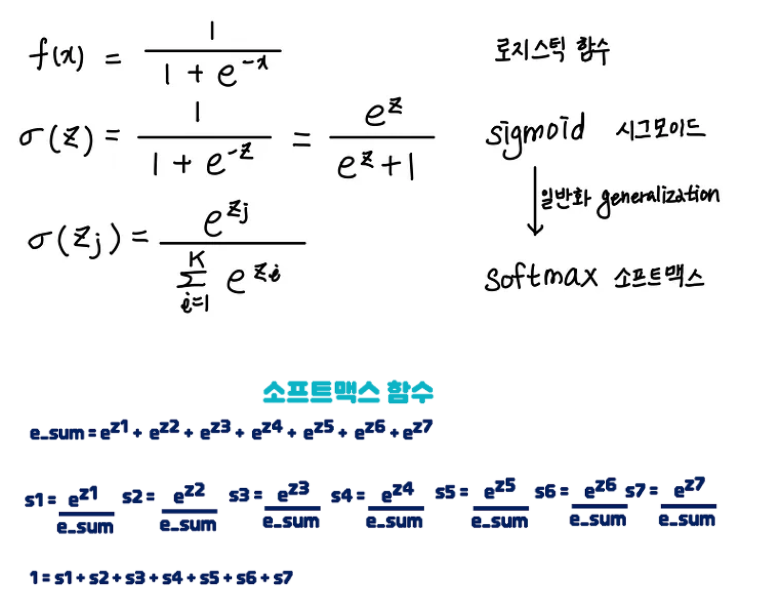

In [58]:
# 0~ 4번 인덱스의 테스트 리스트에서 결과 출력 가능
decision = lr.decision_function(test_scaled[:5])
print("5개 샘플에 대한 z1 ~ z7의 값\n")
for idx,z in enumerate(decision): # 선형방정식를 이용한 7개의 특성의 값
    print(f"{idx}번째 샘플의 z값\n{z}\n")

5개 샘플에 대한 z1 ~ z7의 값

0번째 샘플의 z값
[-6.50722806  1.03902669  5.16819136 -2.7573035   3.33655199  0.34625853
 -0.62549701]

1번째 샘플의 z값
[-10.87900739   1.94410616   4.77600603  -2.42306185   2.98748716
   7.84171366  -4.24724376]

2번째 샘플의 z값
[-4.33809947 -6.23690278  3.16746647  6.48091388  2.36412675  2.43431894
 -3.87182378]

3번째 샘플의 z값
[-0.69143987  0.44628536  2.64291145 -1.21457288  3.2612452  -5.70143412
  1.25700487]

4번째 샘플의 z값
[-6.40138602 -1.9913762   5.81526371 -0.13464404  3.49905131 -0.08753491
 -0.69937384]



In [59]:
from scipy.special import softmax           # 소프트맥스를 사용하여 7개를 100%로 분류
print("소프트맥스 함수로 예측 확률 구하기\n")
class_ = lr.classes_.tolist() + ["예측 결과"]
prd = lr.predict(test_scaled[:5]).reshape(5,-1)
sm = softmax(decision, axis=1).round(2) * 100
con = np.column_stack((sm,prd))
print(pd.DataFrame(con,columns=class_))

소프트맥스 함수로 예측 확률 구하기

  Bream Parkki Perch  Pike Roach Smelt Whitefish  예측 결과
0   0.0    1.0  84.0   0.0  13.0   1.0       0.0  Perch
1   0.0    0.0   4.0   0.0   1.0  95.0       0.0  Smelt
2   0.0    0.0   3.0  93.0   2.0   2.0       0.0   Pike
3   1.0    3.0  31.0   1.0  57.0   0.0       8.0  Roach
4   0.0    0.0  90.0   0.0   9.0   0.0       0.0  Perch
